In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import os 
from analysis_functions import dt_from_measurement_dir, gaussian_from, gaussian

In [3]:
plt.style.use('ggplot')

In [4]:
base_dir = 'Breakdown_Measurements_LED'
sub_dirs = os.listdir(base_dir)
sub_dirs = sub_dirs[1:]

In [5]:
!rm Breakdown_Measurements_LED/G0.05mm_V780V_LED10mA7_29/.DS_Store

rm: Breakdown_Measurements_LED/G0.05mm_V780V_LED10mA7_29/.DS_Store: No such file or directory


In [6]:
led10 = dt_from_measurement_dir(os.path.join(base_dir,sub_dirs[4])) * 1e6
led20 = dt_from_measurement_dir(os.path.join(base_dir,sub_dirs[2])) * 1e6
led50 = dt_from_measurement_dir(os.path.join(base_dir,sub_dirs[3])) * 1e6
led100 = dt_from_measurement_dir(os.path.join(base_dir,sub_dirs[0])) * 1e6

In [7]:
mean_10, std_10, t_10, gauss_10 = gaussian_from(led10)
mean_20, std_20, t_20, gauss_20 = gaussian_from(led20)
mean_50, std_50, t_50, gauss_50 = gaussian_from(led50)
mean_100, std_100, t_100, gauss_100 = gaussian_from(led100)

In [8]:
from scipy.integrate import quadrature
from scipy.stats import chisquare 
from analysis_functions import gaussian_expected_values

In [9]:
hist10, edges10 = np.histogram(led10,bins=40,density=True)
hist20, edges20 = np.histogram(led20,bins=40,density=True)
hist50, edges50 = np.histogram(led50,bins=40,density=True)
hist100, edges100 = np.histogram(led100,bins=40,density=True)

In [10]:
observed10 = hist10 * (edges10[1] - edges10[0])
expected10 = gaussian_expected_values(mean_10,std_10,edges10)

observed20 = hist20 * (edges20[1] - edges20[0])
expected20 = gaussian_expected_values(mean_20,std_20,edges20)

observed50 = hist50 * (edges50[1] - edges50[0])
expected50 = gaussian_expected_values(mean_50,std_50,edges50)

observed100 = hist100 * (edges100[1] - edges100[0])
expected100 = gaussian_expected_values(mean_100,std_100,edges100)

In [11]:
chi10 = np.sum((observed10-expected10)**2/expected10) / (40-3)
chi20 = np.sum((observed20-expected20)**2/expected20) / (40-3)
chi50 = np.sum((observed50-expected50)**2/expected50) / (40-3)
chi100 = np.sum((observed100-expected100)**2/expected100) / (40-3)
print((chi10,chi20,chi50,chi100))

(0.004895810438076364, 0.0045474405261851205, 0.0036911526919612653, 0.003946072645031997)


In [12]:
text10 = '\n'.join((
    r'$\mu$=' + f'{round(mean_10,2)} ' + r'$\mu s$',
    r'$\sigma$=' + f'{round(std_10,2)} ' + r'$\mu s$',
    r'$\chi^2$=' + f'{round(chi10,4)} '
        ))

text20 = '\n'.join((
    r'$\mu$=' + f'{round(mean_20,2)} ' + r'$\mu s$',
    r'$\sigma$=' + f'{round(std_20,2)} ' + r'$\mu s$',
    r'$\chi^2$=' + f'{round(chi20,4)} '
        ))

text50 = '\n'.join((
    r'$\mu$=' + f'{round(mean_50,2)} ' + r'$\mu s$',
    r'$\sigma$=' + f'{round(std_50,2)} ' + r'$\mu s$',
    r'$\chi^2$=' + f'{round(chi50,4)}'
        ))

text100 = '\n'.join((
    r'$\mu$=' + f'{round(mean_100,2)} ' + r'$\mu s$',
    r'$\sigma$=' + f'{round(std_100,2)} ' + r'$\mu s$',
    r'$\chi^2$=' + f'{round(chi100,4)} '
        ))

In [13]:
props = dict(boxstyle='round', facecolor='white', alpha=0.5)

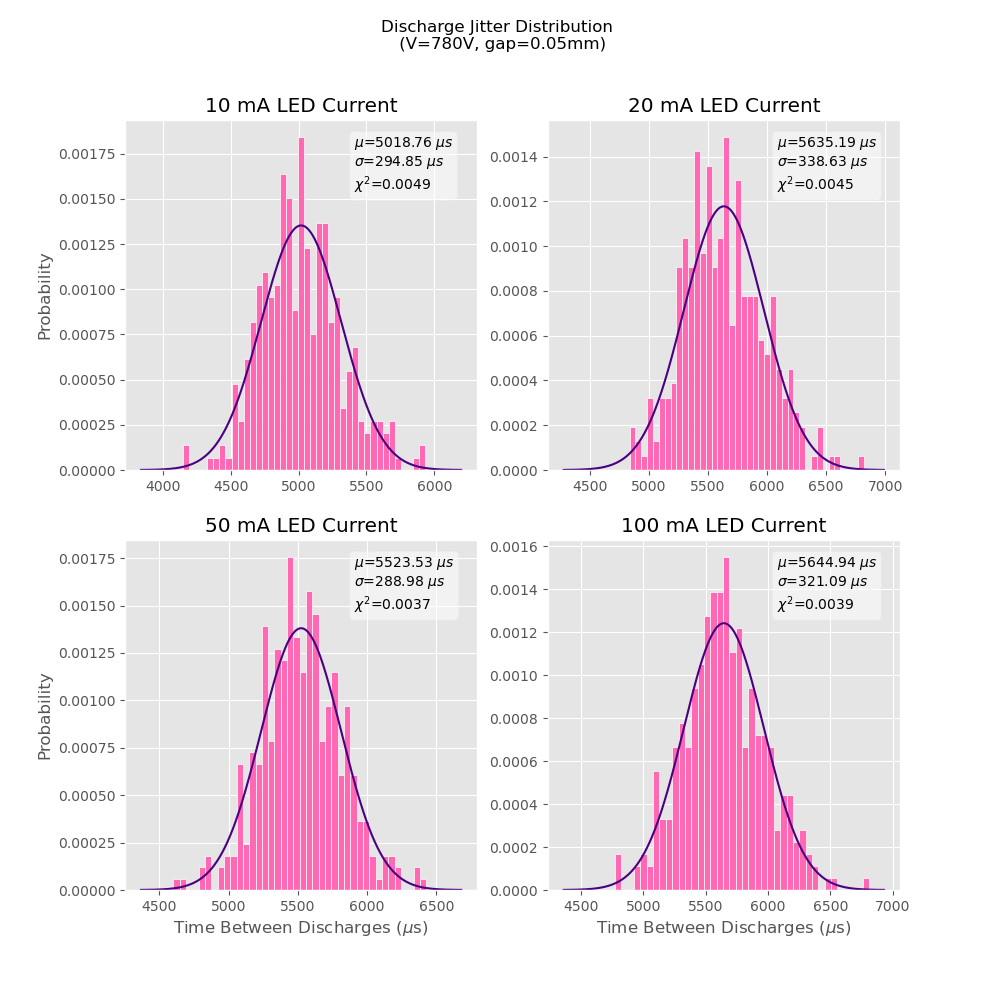

In [14]:
fig, axes = plt.subplots(2,2,figsize=(10,10))
fig.suptitle('Discharge Jitter Distribution \n (V=780V, gap=0.05mm)')


axes[0][0].set_title('10 mA LED Current')
axes[0][1].set_title('20 mA LED Current')
axes[1][0].set_title('50 mA LED Current')
axes[1][1].set_title('100 mA LED Current')

axes[0][0].plot(t_10,gauss_10,color='indigo')
axes[0][1].plot(t_20,gauss_20,color='indigo')
axes[1][0].plot(t_50,gauss_50,color='indigo')
axes[1][1].plot(t_100,gauss_100,color='indigo')

axes[0][0].hist(led10,density=True,color='hotpink',edgecolor='white',bins=40)
axes[0][1].hist(led20,density=True,color='hotpink',edgecolor='white',bins=40)
axes[1][0].hist(led50,density=True,color='hotpink',edgecolor='white',bins=40)
axes[1][1].hist(led100,density=True,color='hotpink',edgecolor='white',bins=40)

axes[0][0].text(0.65, 0.80, text10,transform=axes[0][0].transAxes,bbox=props)
axes[0][1].text(0.65, 0.80, text20,transform=axes[0][1].transAxes,bbox=props)
axes[1][0].text(0.65, 0.80, text50,transform=axes[1][0].transAxes,bbox=props)
axes[1][1].text(0.65, 0.80, text100,transform=axes[1][1].transAxes,bbox=props)

axes[0][0].set_ylabel('Probability')
axes[1][0].set_ylabel('Probability')

axes[1][0].set_xlabel(r'Time Between Discharges ($\mu$s)')
axes[1][1].set_xlabel(r'Time Between Discharges ($\mu$s)')

fig.savefig('Distributions.png')

In [15]:
sub_dirs

['G0.05mm_V780V_LED100mA7_29',
 'G0.05mm_V780V_LED20mA_take_27_29',
 'G0.05mm_V780V_LED20mA7_29',
 'G0.05mm_V780V_LED50mA7_29',
 'G0.05mm_V780V_LED10mA7_29']

In [16]:
#10, 20, 50, 100
data = [np.load(os.path.join(os.path.join(base_dir, sub_dirs[4]), 'trial_2.npy')),
        np.load(os.path.join(os.path.join(base_dir, sub_dirs[2]), 'trial_1.npy')),
        np.load(os.path.join(os.path.join(base_dir, sub_dirs[3]), 'trial_1.npy')),
        np.load(os.path.join(os.path.join(base_dir, sub_dirs[0]), 'trial_1.npy'))]

In [17]:
sub_dirs

['G0.05mm_V780V_LED100mA7_29',
 'G0.05mm_V780V_LED20mA_take_27_29',
 'G0.05mm_V780V_LED20mA7_29',
 'G0.05mm_V780V_LED50mA7_29',
 'G0.05mm_V780V_LED10mA7_29']

In [18]:
from analysis_functions import frames
from analysis_functions import rc_basic

In [19]:
#10,20,50,100
f = [frames(d[1],threshold=-300)[1:] for d in data] #exclude the first frame

In [20]:
dt = [(d[0][1] - d[0][0]) for d in data]
t = [
        [ 
            ( np.linspace(0, len(f[i][j]) * dt[i], len(f[i][j])) )
         for j in range(len(f[i])) ] 
    for i in range(len(f)) ]

In [21]:
from scipy.optimize import curve_fit

In [22]:
p0 = [800,0.0015,0]

fits = [
    np.array([
        curve_fit(rc_basic, t[i][j], f[i][j], p0=p0)[0] #get the first argument of curve fit, which are the fit parameters
    for j in range(len(f[i])) ]).transpose() #transpose the resulting array, giving an epsilon row, a tau row, and a t_0 row
for i in range(len(f)) ]

In [23]:
fits[0].shape

(3, 329)

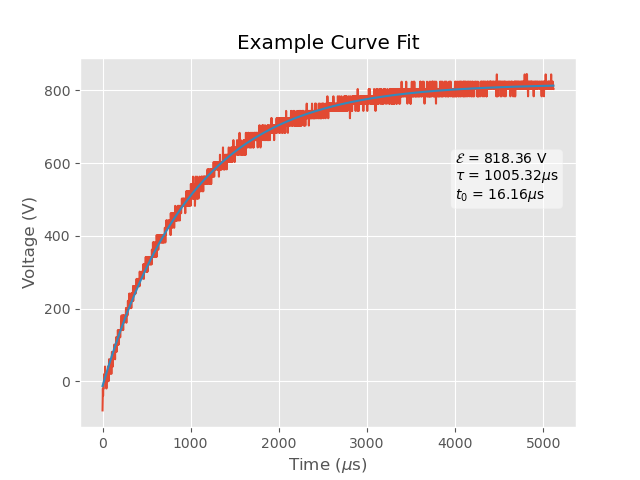

In [24]:
epsilon = fits[2][0][100]; tau = fits[2][1][100] * 1e6; t_0 = fits[2][2][100] * 1e6

text = '\n'.join((r'$\mathcal{E}$ = ' + f'{round(epsilon,2)} V',
                  r'$\tau$ = ' + f'{round(tau,2)}' + r'$\mu$s',
                  r'$t_0$' + f' = {round(t_0,2)}' + r'$\mu$s'))


t_fit = np.linspace(0, t[2][100][-1] * 1e6, 5000)
plt.figure()
plt.plot(t[2][100] * 1e6,f[2][100],label='Fit')
plt.plot(t_fit, rc_basic(t_fit, epsilon, tau, t_0),label='Data')
plt.text(4000,500,text,bbox=props)

plt.title('Example Curve Fit')
plt.ylabel('Voltage (V)')
plt.xlabel(r'Time ($\mu$s)')
plt.savefig('Example_Curve_Fit.png')

In [25]:
max_v = [
    np.array([
        rc_basic(t[i][j][-1], fits[i][0][j],fits[i][1][j],fits[i][2][j])
    for j in range(fits[i].shape[1]) ])
for i in range(len(fits)) ]

In [26]:
mean_v = [v.mean() for v in max_v]
std_v = [v.std() for v in max_v]

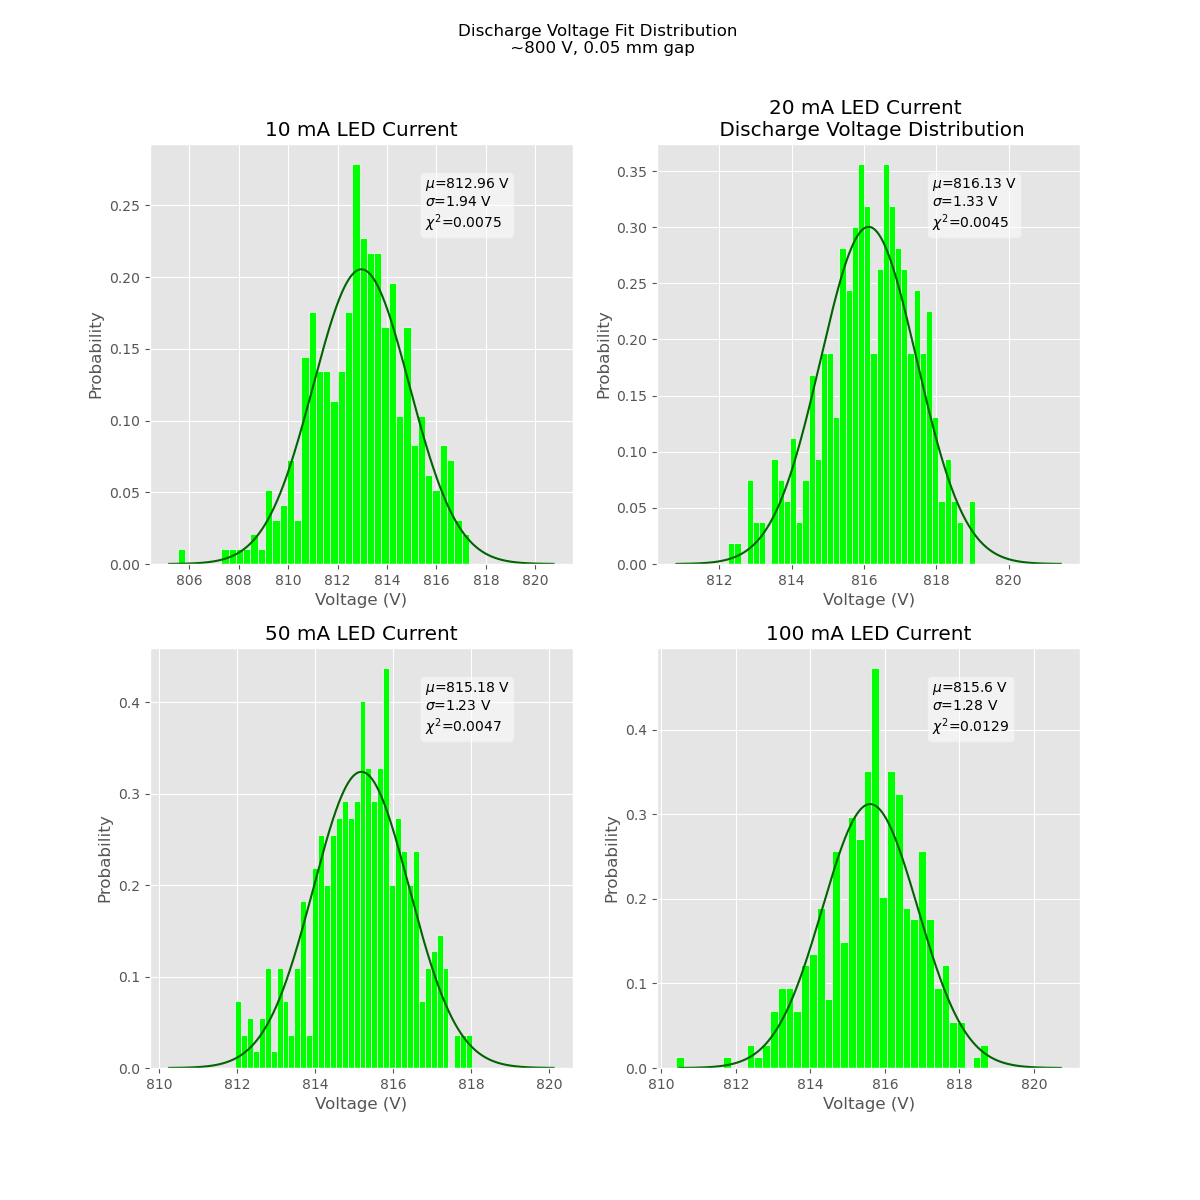

In [33]:
fig, axes = plt.subplots(2,2,figsize=(12,12))
fig.suptitle('Discharge Voltage Fit Distribution \n ~800 V, 0.05 mm gap')

for i in range(4):
    v = np.linspace(mean_v[i] - 4 * std_v[i], mean_v[i] + 4 * std_v[i], 5000)
    gauss = gaussian(v, mean_v[i], std_v[i])
    
    j = int(np.floor(i / 2))
    k = i % 2
    
    axes[j][k].hist(max_v[i],bins=40,density=True,color='lime',edgecolor='white')
    axes[j][k].plot(v, gauss, color='darkgreen')
    
    #calculate chi^2 
    hist, edges = np.histogram(max_v[i], density=True, bins=40) 
    observed = hist * (edges[1] - edges[0])
    expected = gaussian_expected_values(mean_v[i], std_v[i], edges)
    
    r_chi = np.sum((observed-expected)**2/expected) / (40 - 6)
    text = '\n'.join((
    r'$\mu$=' + f'{round(mean_v[i],2)} ' + r'V',
    r'$\sigma$=' + f'{round(std_v[i],2)} ' + r'V',
    r'$\chi^2$=' + f'{round(r_chi,4)} '
        ))
    
    axes[j][k].text(0.65,0.80,text,transform=axes[j][k].transAxes,bbox=props)
    axes[j][k].set_ylabel('Probability')
    axes[j][k].set_ylabel('Probability')

    axes[j][k].set_xlabel('Voltage (V)')
    axes[j][k].set_xlabel('Voltage (V)')
    
axes[0][0].set_title('10 mA LED Current')
axes[0][1].set_title('20 mA LED Current \n Discharge Voltage Distribution')
axes[1][0].set_title('50 mA LED Current')
axes[1][1].set_title('100 mA LED Current') 

axes[0][0].set_ylabel('Probability')
axes[1][0].set_ylabel('Probability')

axes[1][0].set_xlabel('Voltage (V)')
axes[1][1].set_xlabel('Voltage (V)')

fig.savefig('Voltage_Distributions.png')

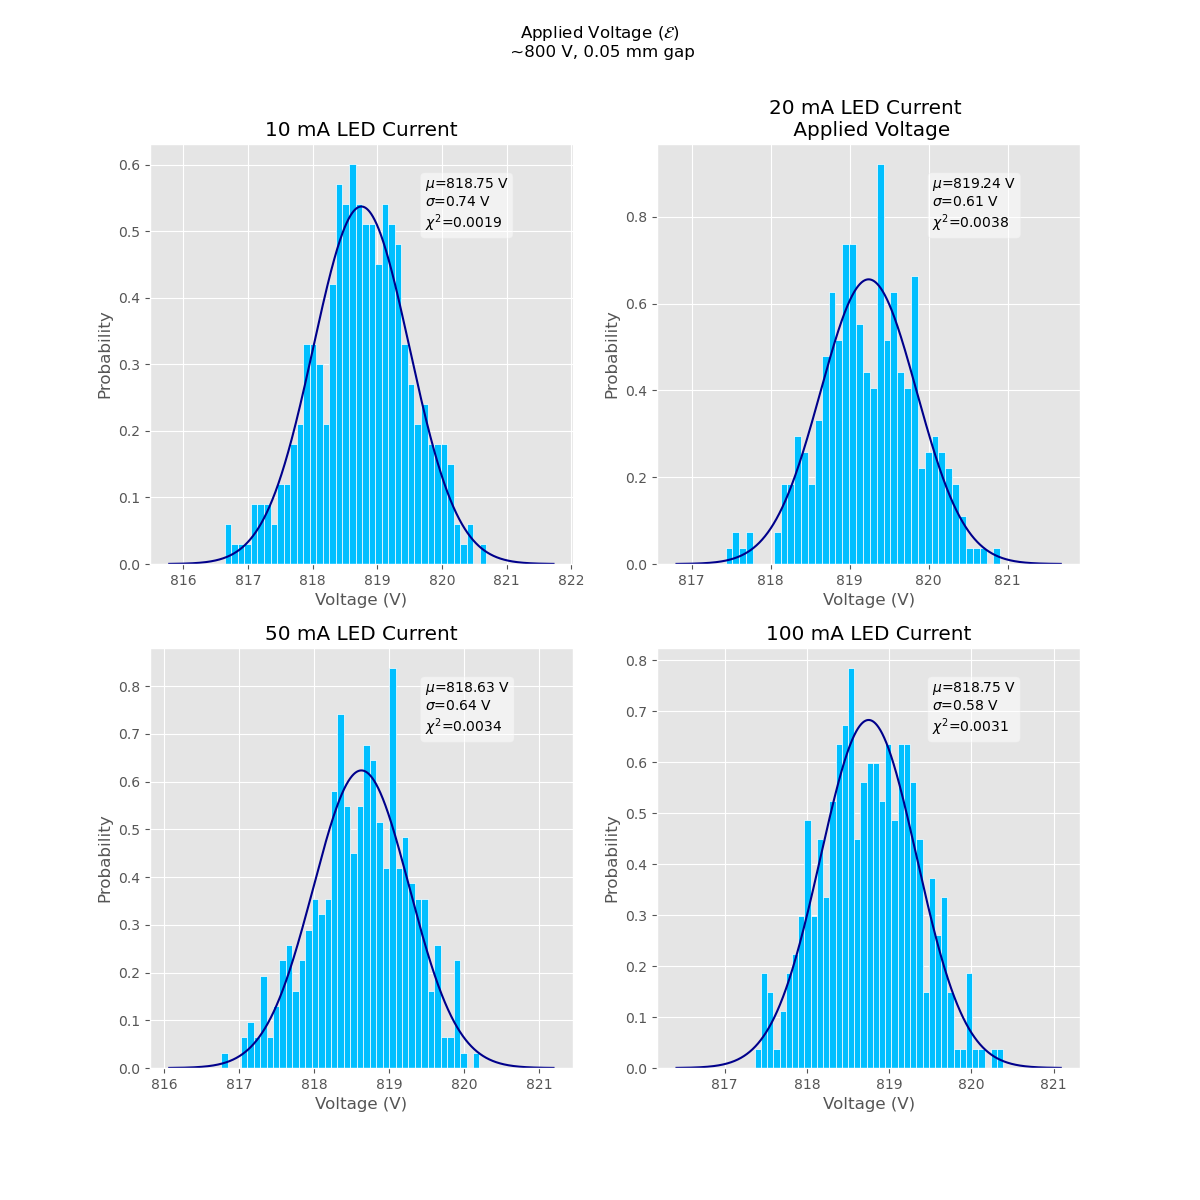

In [34]:
fig, axes = plt.subplots(2,2,figsize=(12,12))
fig.suptitle(r'Applied Voltage ($\mathcal{E}$)' +  '\n ~800 V, 0.05 mm gap')

for i in range(4):
    emf = fits[i][0]
    mean = emf.mean()
    std = emf.std()
    
    e = np.linspace(mean - 4 * std, mean + 4 * std, 5000)
    gauss = gaussian(e, mean, std)
    
    j = int(np.floor(i / 2))
    k = i % 2
    
    axes[j][k].hist(emf,bins=40,density=True,color='deepskyblue',edgecolor='white')
    axes[j][k].plot(e, gauss, color='darkblue')
    
    #calculate chi^2 
    hist, edges = np.histogram(emf, density=True, bins=40) 
    observed = hist * (edges[1] - edges[0])
    expected = gaussian_expected_values(mean, std, edges)
    
    r_chi = np.sum((observed-expected)**2/expected) / (40 - 6)
    text = '\n'.join((
    r'$\mu$=' + f'{round(mean,2)} ' + r'V',
    r'$\sigma$=' + f'{round(std,2)} ' + r'V',
    r'$\chi^2$=' + f'{round(r_chi,4)} '
        ))
    
    axes[j][k].text(0.65,0.80,text,transform=axes[j][k].transAxes,bbox=props)
    
    axes[j][k].set_ylabel('Probability')
    axes[j][k].set_ylabel('Probability')

    axes[j][k].set_xlabel('Voltage (V)')
    axes[j][k].set_xlabel('Voltage (V)')
    
axes[0][0].set_title('10 mA LED Current')
axes[0][1].set_title('20 mA LED Current \n Applied Voltage')
axes[1][0].set_title('50 mA LED Current')
axes[1][1].set_title('100 mA LED Current') 

axes[0][0].set_ylabel('Probability')
axes[1][0].set_ylabel('Probability')

axes[1][0].set_xlabel('Voltage (V)')
axes[1][1].set_xlabel('Voltage (V)')

plt.savefig('Applied_Voltages.png')

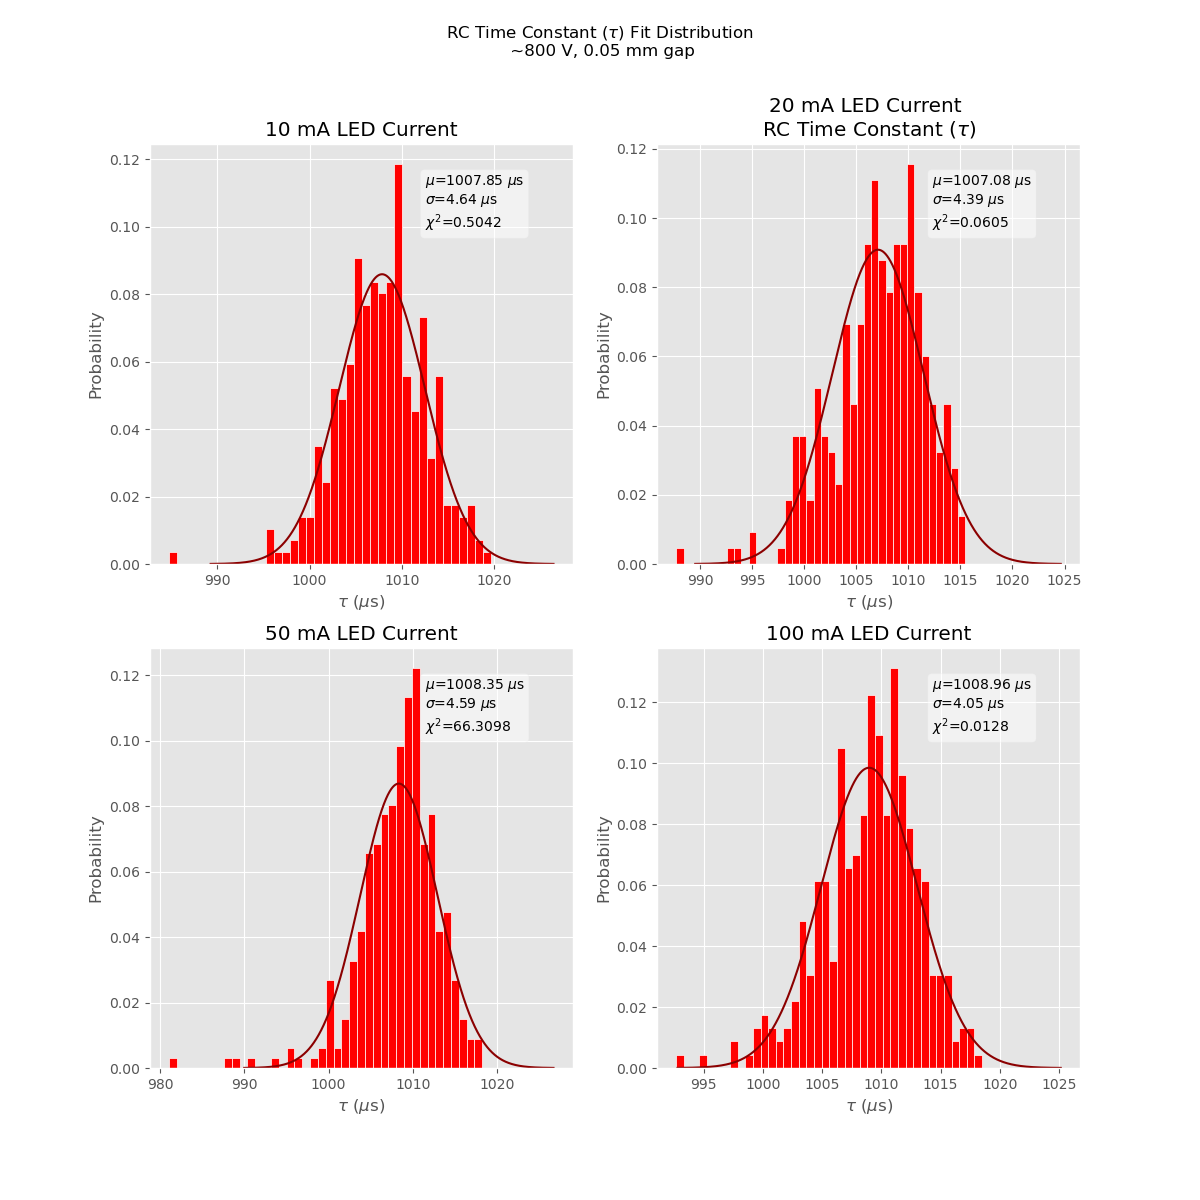

In [38]:
fig, axes = plt.subplots(2,2,figsize=(12,12))
fig.suptitle(r'RC Time Constant ($\tau$) Fit Distribution' +  '\n ~800 V, 0.05 mm gap')

for i in range(4):
    tau = fits[i][1] * 1e6
    mean = tau.mean()
    std = tau.std()
    
    e = np.linspace(mean - 4 * std, mean + 4 * std, 5000)
    gauss = gaussian(e, mean, std)
    
    j = int(np.floor(i / 2))
    k = i % 2
    
    axes[j][k].hist(tau,bins=40,density=True,color='red',edgecolor='white')
    axes[j][k].plot(e, gauss, color='darkred')
    
    #calculate chi^2 
    hist, edges = np.histogram(tau, density=True, bins=40) 
    observed = hist * (edges[1] - edges[0])
    expected = gaussian_expected_values(mean, std, edges)
    
    r_chi = np.sum((observed-expected)**2/expected) / (40 - 6)
    text = '\n'.join((
    r'$\mu$=' + f'{round(mean,2)} ' + r'$\mu$s',
    r'$\sigma$=' + f'{round(std,2)} ' + r'$\mu$s',
    r'$\chi^2$=' + f'{round(r_chi,4)} '
        ))
    
    axes[j][k].text(0.65,0.80,text,transform=axes[j][k].transAxes,bbox=props)
    
    axes[j][k].set_ylabel('Probability')
    axes[j][k].set_ylabel('Probability')

    axes[j][k].set_xlabel(r'$\tau$ ($\mu$s)')
    axes[j][k].set_xlabel(r'$\tau$ ($\mu$s)')
    
axes[0][0].set_title('10 mA LED Current')
axes[0][1].set_title('20 mA LED Current \n' +  r'RC Time Constant ($\tau$)')
axes[1][0].set_title('50 mA LED Current')
axes[1][1].set_title('100 mA LED Current') 

axes[0][0].set_ylabel('Probability')
axes[1][0].set_ylabel('Probability')

axes[1][0].set_xlabel(r'$\tau$ ($\mu$s)')
axes[1][1].set_xlabel(r'$\tau$ ($\mu$s)')
plt.savefig('RC_Time.png')